# LQR: Dynamic Programming

Consider a standard finite-horizon LQR problem:
$$
\begin{aligned}
    \min_{x_{0:N},\,u_{0:N-1}} &\sum_{k=0}^{N-1} \Bigg(\frac{1}{2}x_k^\top Q x_k + \frac{1}{2}u_k^\top R u_k \Bigg) + \frac{1}{2}x_N^T P x_N \\
    \textrm{s.t.} \quad &x_{k+1} = A x_k + B u_k,\; i = 0, \cdots, N-1.
\end{aligned}
$$

- Value function (cost-to-go): $\; V(x) = \frac{1}{2} x^\top \Pi x$

- Bellman equation:
$$
\begin{aligned}
    V(x_k) &= \min_{u_k} \quad \ell(x_k, u_k) + V(x_{k+1}) \\
    &= \min_{u_k} \quad \frac{1}{2}x_k^\top Q x_k + \frac{1}{2}u_k^\top R u_k + \frac{1}{2}(A x_k + B u_k)^\top \Pi_{k+1} (A x_k + B u_k)  \\
    &= \min_{u_k} \quad \frac{1}{2}u_k^\top (R + B^\top \Pi_{k+1} B) u_k + x_k^\top(A^\top \Pi_{k+1} B)u_k + \textcolor{blue}{\text{constant}} \\
    &= \min_{u_k} \quad Q(x_k, u_k)
\end{aligned}
$$

- Optimal control input $u_k^*$:
$$
\frac{\partial Q}{\partial u_k} = (R + B^\top \Pi_{k+1} B) u_k^* + B^\top \Pi_{k+1} A x_k = 0
$$
$$
\begin{aligned}
    u_k^* &= - (R + B^\top \Pi_{k+1} B)^{-1} B^\top \Pi_{k+1} A x_k \\
    & = K_k x_k
\end{aligned}
$$
P.S. *It is usually inefficient to directly compute the inverse of a matrix. Please use linear solvers or appropriate matrix factorizations. https://nl.mathworks.com/help/matlab/ref/double.mldivide.html*

- Value function at stage $k$:`
$$
\begin{aligned}
    V(x_k) &= \frac{1}{2}x_k^\top Q x_k + \frac{1}{2}\red{u_k^{*}}^\top R \red{u_k^{*}} + \frac{1}{2}(A x_k + B \red{u_k^{*}})^\top \Pi_{k+1} (A x_k + B \red{u_k^{*}}) \\
    &= \frac{1}{2}x_k^\top \left(  \underbrace{Q + K_k^\top R K_k + (A + BK_k)^\top \Pi_{k+1} (A + BK_k)}_{\Pi_k}  \right) x_k \\
    &= \frac{1}{2}x_k^\top \Pi_k x_k
\end{aligned}
$$
In the end, we obtain
$$
\Pi_k = Q + K_k^\top R K_k + (A + BK_k)^\top \Pi_{k+1} (A + BK_k).
$$
This is called the **Discrete Time Riccati equation**. At times, you may encounter an alternative form of $\Pi_{k}$. Let us derive it now.
$$
\begin{aligned}
\Pi_k &= Q + K_k^\top R K_k + (A + BK_k)^\top \Pi_{k+1} (A + BK_k) \\
&= Q + \red{K_k^\top R K_k} + A^\top \Pi_{k+1} A + \red{K_k^\top B^\top \Pi_{k+1} B K_k} + 2 A^\top \Pi B K_k \\
&= Q + A^\top \Pi_{k+1} A + 2 A^\top \Pi_{k+1} B K_k + \red{K_k^\top (R + B^\top \Pi_{k+1} B) K_k} \\
& = Q + A^\top \Pi_{k+1} A + 2 A^\top \Pi_{k+1} B K_k - K_k^\top (R + B^\top \Pi_{k+1} B) \underbrace{(R + B^\top \Pi_{k+1} B)^{-1} B^\top \Pi_{k+1} A}_{K_k} \\
&= Q + A^\top \Pi_{k+1} A + A^\top \Pi_{k+1} B K_k .
\end{aligned}
$$

# LQR: KKT conditions

We can view a LQR problem as a quadratic program with equality constraints. The corresponding Lagrangian is expresed as:

$$
\mathcal{L} (\bar{x}, \bar{u}, \bar{\lambda}) = \sum_{k=0}^{N-1} \Bigg(\frac{1}{2}x_k^\top Q x_k + \frac{1}{2}u_k^\top R u_k + \lambda_{k+1}^\top \left(A x_k + B u_k - x_{k+1} \right) \Bigg) + \frac{1}{2}x_N^T P x_N
$$

where $\bar{\lambda} = (\lambda_1, \cdots, \lambda_N)$ is a vector of Lagrange multipliers. The KKT conditions are derived as:
$$
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \bar{x}} = 0,\;
\frac{\partial \mathcal{L}}{\partial \bar{u}} = 0,\;
\frac{\partial \mathcal{L}}{\partial \bar{\lambda}} = 0,
\end{aligned}
$$

$$
\begin{equation*}
    \left[
    \begin{array}{ccccccccc}
        R & B^\top \\
        B & & -I\\
        \hline
        & -I & Q & 0 & A^\top \\
        & &  0 & R & B^\top  \\
        & & A & B & & -I \\
        \hline
        & & & & -I & Q & 0 & A^\top \\
        & & & & & 0 & R & B^\top \\
        & & & & & A & B & & -I \\
        \hline
        & & & & & & & -I & P 
    \end{array}
    \right]
    \left[
    \begin{array}{c}
        u_0 \\
        \lambda_1 \\
        \hline
        x_1 \\
        u_1 \\
        \lambda_2 \\
        \hline
        x_2 \\
        u_2 \\
        \lambda_3 \\
        \hline
         x_3
    \end{array}
    \right] = 
    \left[
    \begin{array}{c}
        0 \\
        -A x_0 \\
        \hline
        0 \\  
        0 \\
        0 \\
        \hline
        0 \\  
        0 \\
        0 \\
        \hline
        0
    \end{array}
    \right]
\end{equation*}.
$$

Let us solve this banded linear system. 

The last row:
$$
\lambda_3 = P x_3 := \red{\Pi_3} x_3
$$

The 3rd last row:
$$
\begin{aligned}
R u_2 + B^\top \lambda_3 &= 0 \\
R u_2 + B^\top (P x_3) &= 0 \\
R u_2 + B^\top P (A x_2 + B u_2) &= 0 \\
(R + B^\top P B) u_2 &= - B^\top P A x_2 \\
u_2 &= \underbrace{- (R + B^\top P B)^{-1} B^\top P A}_{K_2} x_2
\end{aligned}
$$

The 4th last row:
$$
\begin{aligned}
-\lambda_2 + Q x_2 + A^\top \lambda_3 &= 0 \\
-\lambda_2 + Q x_2 + A^\top P x_3 &= 0 \\ 
-\lambda_2 + Q x_2 + A^\top P (A x_2 + B u_2) &= 0 \\ 
-\lambda_2 + Q x_2 + A^\top P (A x_2 + B K_2 x_2) &= 0 \\
\lambda_2 &= \left( Q + A^\top P (A + B K_2) \right) x_2 := \red{\Pi_2} x_2
\end{aligned}
$$
Then, we can repeat the same procedure until the initial stage. This derivation process is closely connected to dynamic programming, and the relationship between the Lagrange multiplier and the value function is given by: 
$$
\lambda_k = \Pi_k x_k = \frac{\partial V}{\partial x_k}
$$

In [30]:
import numpy as np
from scipy.linalg import cho_factor, cho_solve
from control import dare

def lqr_backward(Q, R, Qf, N):
    """
    Backward pass of the LQR algorithm
    """
    nx = Q.shape[0]
    nu = R.shape[0]

    Ps = np.zeros((N + 1, nx, nx))
    Ks = np.zeros((N, nu, nx))
    
    Ps[-1, :, :] = Qf
    for i in range(N - 1, -1, -1):
        P_next = Ps[i + 1, :, :]        
        chofac = cho_factor(R + B.T @ P_next @ B)      
        K_k = - cho_solve(chofac, B.T @ P_next @ A)    
        
        # Two equivalent ways to compute P_k    
        # P_k = Q + K_k.T @ R @ K_k + (A + B @ K_k).T @ P_next @ (A + B @ K_k)
        P_k = Q + A.T @ P_next @ A + A.T @ P_next @ B @ K_k
        
        Ks[i, :, :] = K_k
        Ps[i, :, :] = P_k
                
    return Ks, Ps

def lqr_forward(A, B, Ks, x0):
    """
    Forward pass of the LQR algorithm
    """
    N = Ks.shape[0]
    nx = A.shape[0]
    nu = B.shape[1]
    
    x_bar = np.zeros((N + 1, nx))
    u_bar = np.zeros((N, nu))
    
    x_bar[0, :] = x0
    for k in range(N):
        u_bar[k, :] = Ks[k, :, :] @ x_bar[k, :]
        x_bar[k + 1, :] = A @ x_bar[k, :] + B @ u_bar[k, :]
    
    return x_bar, u_bar

def simulate(A, B, Q, R, Qf, N, N_sim, x0):
    """
    Simulate the system with the finite-horizon LQR controller
    """
    nx = A.shape[0]
    nu = B.shape[1]
    
    x_bar_cl = np.zeros((N_sim + 1, nx))
    u_bar_cl = np.zeros((N_sim, nu))
    x_bars_pred = np.zeros((N_sim + 1, N + 1, nx))
    u_bars_pred = np.zeros((N_sim, N, nu)) 
    
    x_bar_cl[0, :] = x0
    Ks, _ = lqr_backward(Q, R, Qf, N)
    for i in range(N_sim):
        x_bars_pred[i, :, :], u_bars_pred[i, :, :] = lqr_forward(A, B, Ks, x_bar_cl[i, :])
        u_bar_cl[i, :] = u_bars_pred[i, 0, :]
        x_bar_cl[i + 1, :] = A @ x_bar_cl[i, :] + B @ u_bar_cl[i, :]
    
    return x_bar_cl, u_bar_cl, x_bars_pred, u_bars_pred

    

In [6]:
A = np.array([
    [4 / 3, -2 / 3], 
    [1, 0]
])
B = np.array([1, 0]).reshape(-1, 1)  # TODO
R = np.array([0.001]).reshape(-1, 1)  # TODO
Q = np.array([
    [4 / 9 + 0.001, -2 / 3],
    [-2 / 3, 1 + 0.001]
])
P = Q.copy()

Ks, Ps = lqr_backward(Q, R, P, 5)

print(f"Ks[0]: {Ks[0]}")

A_cl = A + B @ Ks[0]
eigvals, _ = np.linalg.eig(A_cl)
print(f"eigvals: {eigvals}")



Ks[0]: [[-0.02560941  0.66536146]]
eigvals: [1.30672508e+00 9.98838991e-04]


In [7]:
_, _, K_inf = dare(A, B, Q, R)
K_inf = -K_inf

print(f"K_inf: {K_inf}")

K_inf: [[-0.6682962  0.6660034]]


# Stability of Finite-Horizon Optimal Control Laws

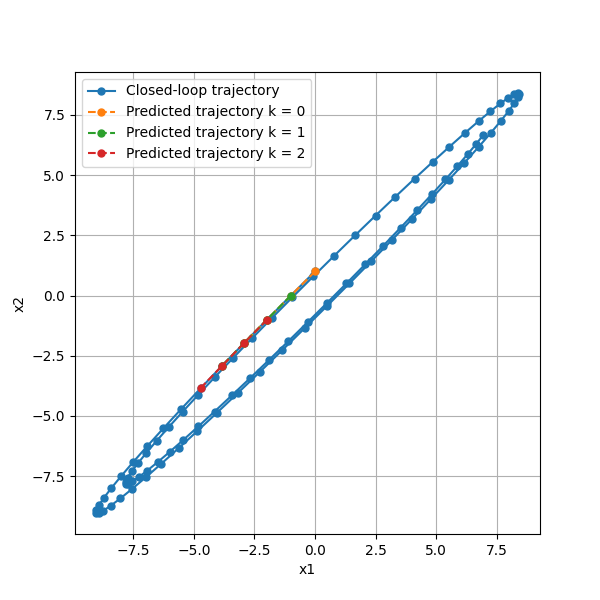

In [47]:
%matplotlib ipympl
import matplotlib.pyplot as plt

A = np.array([
    [1.988, -0.998], 
    [1, 0]
])
B = np.array([0.125, 0]).reshape(-1, 1)  # TODO
Q = np.eye(2)
Qf = np.eye(2)
R = np.array([1.]).reshape(-1, 1)  # TODO

# Horizon length: 5
N = 5
N_sim = 100
x0 = np.array([0, 1])
x_bar_cl, u_bar_cl, x_bars_pred, u_bars_pred = simulate(A, B, Q, R, Q, N, N_sim, x0)

plt.figure(figsize=(6, 6))
plt.plot(x_bar_cl[:, 0], x_bar_cl[:, 1], '-o', label='Closed-loop trajectory', markersize=5)
plt.plot(x_bars_pred[0, :, 0], x_bars_pred[0, :, 1], '--o', label='Predicted trajectory k = 0', markersize=5)
plt.plot(x_bars_pred[1, :, 0], x_bars_pred[1, :, 1], '--o', label='Predicted trajectory k = 1', markersize=5)
plt.plot(x_bars_pred[2, :, 0], x_bars_pred[2, :, 1], '--o', label='Predicted trajectory k = 2', markersize=5)

# plt.xlim(-3, 3)
# plt.ylim(-2, 2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid()
plt.show()

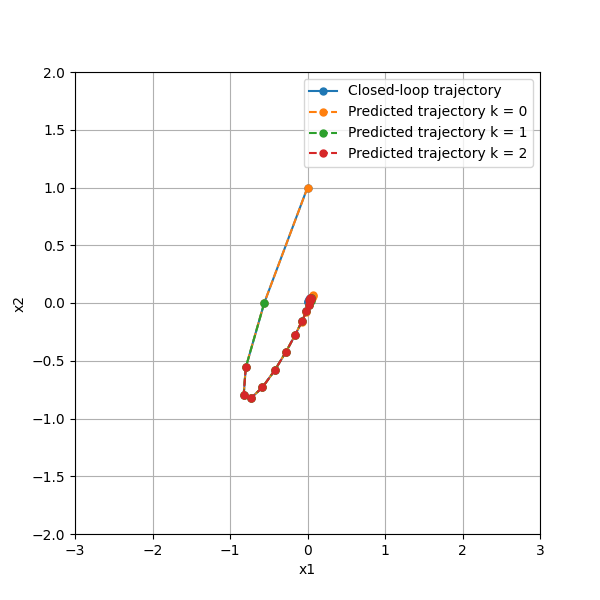

In [29]:
# Horizon length: 20
N = 15
N_sim = 20
x0 = np.array([0, 1])
x_bar_cl, u_bar_cl, x_bars_pred, u_bars_pred = simulate(A, B, Q, R, Q, N, N_sim, x0)

plt.figure(figsize=(6, 6))
plt.plot(x_bar_cl[:, 0], x_bar_cl[:, 1], '-o', label='Closed-loop trajectory', markersize=5)
plt.plot(x_bars_pred[0, :, 0], x_bars_pred[0, :, 1], '--o', label='Predicted trajectory k = 0', markersize=5)
plt.plot(x_bars_pred[1, :, 0], x_bars_pred[1, :, 1], '--o', label='Predicted trajectory k = 1', markersize=5)
plt.plot(x_bars_pred[2, :, 0], x_bars_pred[2, :, 1], '--o', label='Predicted trajectory k = 2', markersize=5)

plt.xlim(-3, 3)
plt.ylim(-2, 2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid()
plt.show()